In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [16]:
df = pd.read_csv("/train.csv")
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [17]:
# Select relevant columns
features = ['GrLivArea', 'BedroomAbvGr', 'FullBath']
target = 'SalePrice'
df = df[features + [target]]


In [18]:
df.isnull().sum()  # Make sure there are no missing values
df = df.dropna()


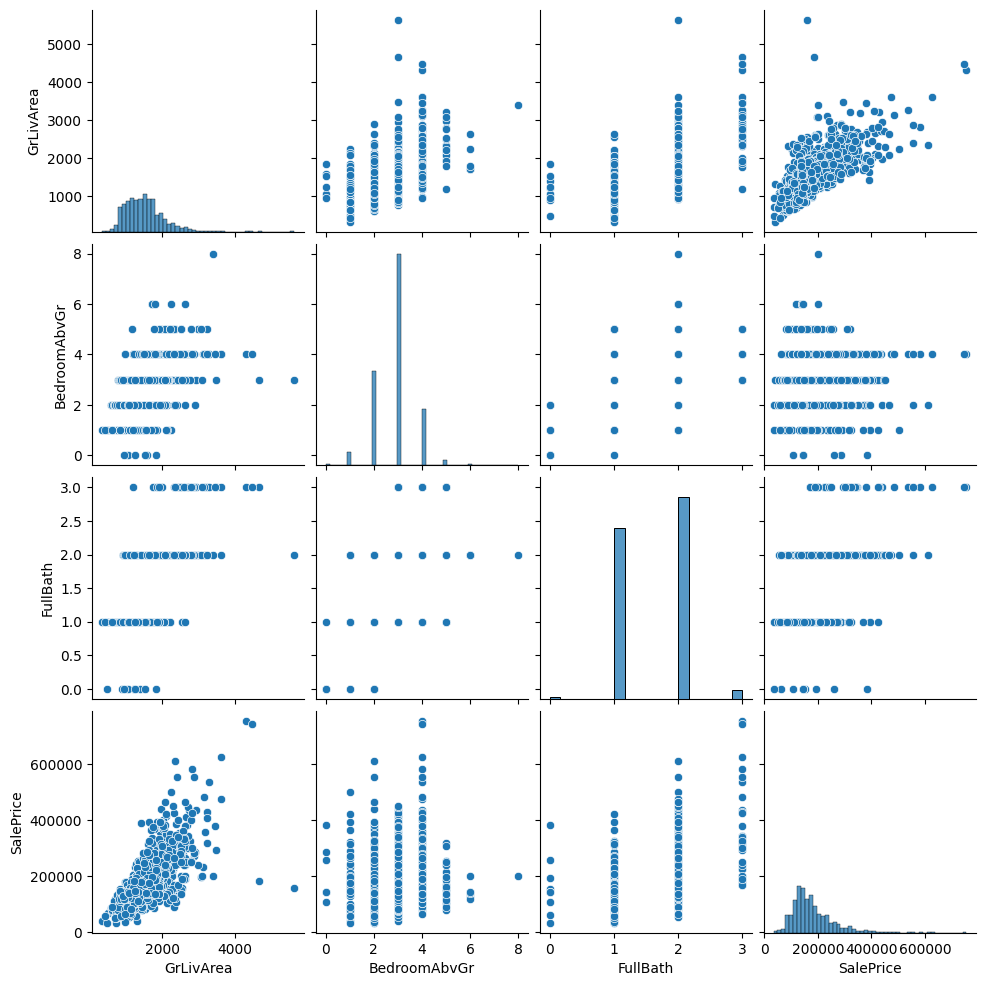

In [19]:
sns.pairplot(df)
plt.show()


In [20]:
X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [21]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [22]:
# Predict on training set
y_train_pred = model.predict(X_train)

# Evaluation on training set
r2_train = r2_score(y_train, y_train_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))

# Predict on test set
y_pred = model.predict(X_test)

# Evaluation on test set
r2_test = r2_score(y_test, y_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))

# Now print training and test results
print("Training Set:")
print(f"  R² Score: {r2_train}")
print(f"  RMSE: {rmse_train}\n")

print("Testing Set:")
print(f"  R² Score: {r2_test}")
print(f"  RMSE: {rmse_test}")


Training Set:
  R² Score: 0.5652084622981051
  RMSE: 50924.807621834334

Testing Set:
  R² Score: 0.6341189942328371
  RMSE: 52975.71771338122


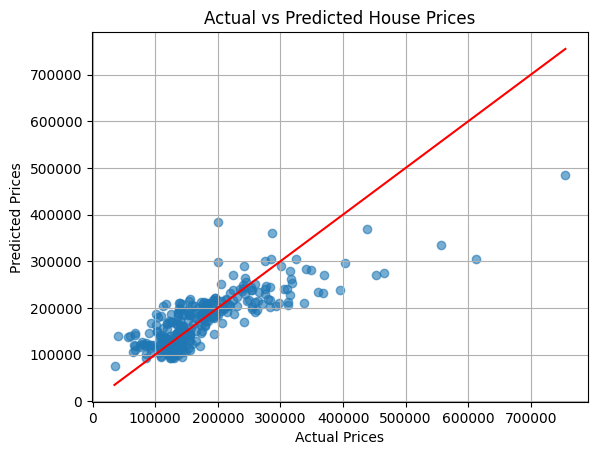

In [23]:
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.grid(True)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red')  # Line of perfect prediction
plt.show()


In [24]:
coefficients = pd.DataFrame({
    "Feature": features,
    "Coefficient": model.coef_
})
print(coefficients)


        Feature   Coefficient
0     GrLivArea    104.026307
1  BedroomAbvGr -26655.165357
2      FullBath  30014.324109
